<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Содержание**    
- [Очереди с приоритетами - куча](#toc1_)    
  - [Задача на программирование: очередь с приоритетами](#toc1_1_)    
- [Практика](#toc2_)    
  - [Непрерывный рюкзак через кучу](#toc2_1_)    
- [Хаффман через кучу](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

# <a id='toc1_'></a>[Очереди с приоритетами - куча](#toc0_)

## <a id='toc1_1_'></a>[Задача на программирование: очередь с приоритетами](#toc0_)
Первая строка входа содержит число операций 1≤n≤10^5. Каждая из последующих n строк задают операцию одного из следующих двух типов:

    Insert x, где 0≤x≤10^9 — целое число;
    ExtractMax.

Первая операция добавляет число x в очередь с приоритетами, вторая — извлекает максимальное число и выводит его.


In [1]:
class inputer():
    def __init__(self):
        self._ptr = 0
    def __call__(self):
        self._ptr += 1
        try:
            return INPUTS.splitlines()[self._ptr-1]
        except IndexError:
            self._ptr = 1
            return INPUTS.splitlines()[self._ptr-1]
        
input = inputer()

In [2]:
INPUTS = """6
Insert 200
Insert 10
ExtractMax
Insert 5
Insert 500
ExtractMax"""

In [3]:
heap = []

def insert(h, val):
    h.append(val)
    i = len(h) - 1
    j = (i - 1) // 2
    
    #Up
    while (i != 0) and (h[i] > h[j]):
        h[i], h[j] = h[j], h[i]
        i, j = j, (j - 1) // 2
    # print(h)

def extractMax(h):
    res = h[0]
    h[0], h[-1] = h[-1], h[0]
    h.pop()
    
    size = len(h)
    i = 0
    
    #Down
    while 2*i + 1 < size:
        left, right = 2*i + 1, 2*i + 2
        j = left
        if right < size and h[right] > h[left]:
            j = right
        if h[i] >= h[j]:
            break
        h[i], h[j] = h[j], h[i]
        i = j
    return res 

def heapify(h):
    res = []
    for i in h:
        insert(res, i)
    return res

heappop = extractMax

input.__init__()
n = int(input())
for i in range(n):
    s = input()
    if s[0] == "I":
        insert(heap, int(s[7:]))
    else:
        print(extractMax(heap))
        

200
500


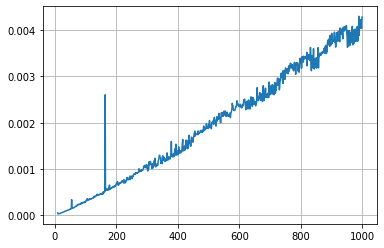

In [4]:
from matplotlib import pyplot as plt
import time, random

def rnd_heap(N):
    h = []
    for i in range(N):
        insert(h, random.randint(1, N))
    for i in range(N):
        extractMax(h)
        
def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

N = 1000
xs = list(range(10, N))
plt.plot(xs, [timed(rnd_heap, x, n_iter=1) for x in xs])
plt.grid(True)
plt.show()


# <a id='toc2_'></a>[Практика](#toc0_)
## <a id='toc2_1_'></a>[Непрерывный рюкзак через кучу](#toc0_)

In [5]:
INPUTS = """3 50
60 20
100 50
120 30"""

In [6]:
import heapq

def knapsack(capacity, val_weights):
    curr_cost, curr_weight = 0, 0
    val_weights.sort(key=lambda x: x[0] / x[1], reverse=True)
    for t in val_weights:
        if curr_weight <= capacity:
            put_weight = min(capacity - curr_weight, t[1])
            curr_cost += put_weight * ( t[0] / t[1] ) 
            curr_weight += put_weight
        else:
            break
    return curr_cost

def knapsack_heapq(capacity, val_weights):
    order = [(-v / w, w) for v, w in val_weights]  # (-) т.к. это мин-куча
    heapq.heapify(order)

    acc = 0
    while order and capacity:
        v_per_w, w = heapq.heappop(order)
        can_take = min(w, capacity)
        acc += -v_per_w * can_take
        capacity -= can_take
    return acc

def knapsack_myheap(capacity, val_weights):
    order = [(v / w, w) for v, w in val_weights]  # (-) т.к. это мин-куча
    heapify(order)

    acc = 0
    while order and capacity:
        v_per_w, w = heappop(order)
        can_take = min(w, capacity)
        acc += v_per_w * can_take
        capacity -= can_take
    return acc


def main():
    reader = (tuple(map(int, line.split())) for line in INPUTS.split('\n'))
    n, capacity = next(reader)
    val_weights = list(reader)
    assert len(val_weights) == n
    opt_value = knapsack_heapq(capacity, val_weights)
    print("{:.3f}".format(opt_value))

def test(func):
    assert func(0, [(60, 20)]) == 0.0
    assert func(25, [(60, 20)]) == 60.0
    assert func(25, [(60, 20), (0, 20)]) == 60.0
    assert func(25, [(60, 20), (50, 50)]) == 60.0 + 5.0
    assert func(50, [(60, 20), (100, 50), (120, 30)]) == 180.0

    for attempt in range(100):
        n = random.randint(1, 1000)
        capacity = random.randint(0, 2 * 10 ** 6)
        val_weights = []
        for i in range(n):
            val_weights.append((random.randint(0, 2 * 10 ** 6),
                                random.randint(1, 2 * 10 ** 6)))

        t = timed(func, capacity, val_weights)
        assert t < 5

test(knapsack_heapq)
test(knapsack_myheap)
test(knapsack)

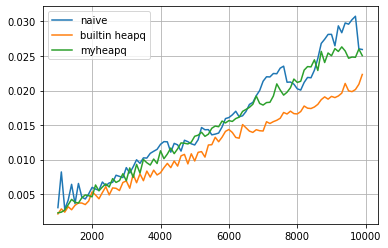

In [7]:
def rnd_case(n, func):
    capacity = random.randint(0, 2 * 10 ** 6)
    val_weights = []
    for i in range(n):
        val_weights.append((random.randint(0, 2 * 10 ** 6),
                            random.randint(1, 2 * 10 ** 6)))
    func(capacity, val_weights)
   
N = 10000
xs = list(range(1000, N, 100))
plt.plot(xs, [timed(rnd_case, x, knapsack, n_iter=1) for x in xs],
         label="naive")
plt.plot(xs, [timed(rnd_case, x, knapsack_heapq, n_iter=1) for x in xs],
         label="builtin heapq")
plt.plot(xs, [timed(rnd_case, x, knapsack_myheap, n_iter=1) for x in xs],
         label="myheapq")
plt.legend()
plt.grid(True)
plt.show()


# <a id='toc3_'></a>[Хаффман через кучу](#toc0_)

In [2]:
import heapq
from collections import Counter, namedtuple


class Node(namedtuple("Node", ["left", "right"])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")

        
class Leaf(namedtuple("Leaf", ["char"])):
    def walk(self, code, acc):
        code[self.char] = acc or "0"            # 0 для длины 1, чтоб код был не пустой


def huffman_encode(s):
    h = []
    for ch, freq in Counter(s).items():
        h.append( (freq, len(h), Leaf(ch)) )    # частота, счетчик (чтобы сравнивать его, а не лист), лист
    heapq.heapify(h)
    count = len(h)
    while len(h) > 1:
        freq1, _count1, left = heapq.heappop(h)
        freq2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (freq1 + freq2, count, Node(left, right)))
        count += 1

    code = {}
    if h:
        [(_freq, _count, root)] = h             # позиционное присваивание в списке, то же, что "*_, root = h[0]"
        print(root)
        root.walk(code, "")
    return code

def huffman_decode(encoded, code):
    decode = {}
    for k, v in code.items():
        decode[v] = k
    chunk, res = '', ''    
    for ch in encoded:
        chunk += ch
        letter = decode.get(chunk, False)
        if letter:
            res += letter
            chunk = ''
    return res

def main():
    s = 'abracadabra'
    code = huffman_encode(s)
    encoded = "".join(code[ch] for ch in s)
    print(len(s), len(encoded))
    for ch in code:
        print("{}: {}".format(ch, code[ch]))
    print(encoded)

def test(n_iter=100):
    import random, string
    
    for i in range(n_iter):
        length = random.randint(0, 5)
        s = "".join(random.choice(string.ascii_letters) for _ in range(length))
        code = huffman_encode(s)
        encoded = "".join(code[ch] for ch in s)
        assert huffman_decode(encoded, code) == s
        
                    
test()

Node(left=Node(left=Leaf(char='A'), right=Leaf(char='k')), right=Node(left=Leaf(char='d'), right=Node(left=Leaf(char='K'), right=Leaf(char='b'))))
Node(left=Leaf(char='u'), right=Node(left=Leaf(char='H'), right=Leaf(char='S')))
Node(left=Node(left=Leaf(char='y'), right=Leaf(char='M')), right=Node(left=Leaf(char='t'), right=Leaf(char='n')))
Node(left=Node(left=Leaf(char='r'), right=Leaf(char='h')), right=Node(left=Leaf(char='N'), right=Leaf(char='n')))
Node(left=Node(left=Leaf(char='O'), right=Leaf(char='Q')), right=Node(left=Leaf(char='D'), right=Leaf(char='g')))
Node(left=Node(left=Leaf(char='C'), right=Leaf(char='r')), right=Node(left=Leaf(char='c'), right=Node(left=Leaf(char='j'), right=Leaf(char='v'))))
Node(left=Leaf(char='R'), right=Leaf(char='P'))
Node(left=Node(left=Leaf(char='x'), right=Leaf(char='Q')), right=Node(left=Leaf(char='g'), right=Leaf(char='s')))
Leaf(char='w')
Node(left=Leaf(char='G'), right=Node(left=Leaf(char='F'), right=Leaf(char='O')))
Leaf(char='H')
Node(left=

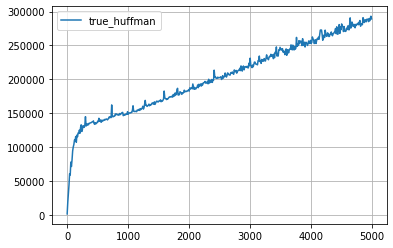

In [2]:
# график похож на n*log(n)
from matplotlib import pyplot as plt
import time, random, string

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter_ns()
        f(*args)
        t1 = time.perf_counter_ns()
        acc = min(acc, t1 - t0)
    return acc


N, step = 5000, 10
sample = lambda x: ''.join(random.choice(string.ascii_letters + string.digits + ' ') for _ in range(x))
args = [sample(x) for x in range(0, N, step)]    # аргументы
xs = list(range(0, N, step))                     # подписи
plt.plot(xs, [timed(huffman_encode, x, n_iter=10) for x in args], label="true_huffman")
plt.legend()
plt.grid(True)
plt.show()
